In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing data

In [2]:
aisles = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/aisles.csv")
orders = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/orders.csv")
products = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/products.csv")
departments = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/departments.csv")
order_prior = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/order_products__prior.csv")
order_train = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/order_products__train.csv")

#### Inspecting data

In [13]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [14]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
orders.describe().round(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3421083.00,3421083.00,3421083.00,3421083.00,3421083.00,3214874.00
mean,1710542.00,102978.21,17.15,2.78,13.45,11.11
std,987581.74,59533.72,17.73,2.05,4.23,9.21
min,1.00,1.00,1.00,0.00,0.00,0.00
25%,855271.50,51394.00,5.00,1.00,10.00,4.00
50%,1710542.00,102689.00,11.00,3.00,13.00,7.00
75%,2565812.50,154385.00,23.00,5.00,16.00,15.00
max,3421083.00,206209.00,100.00,6.00,23.00,30.00


In [15]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [19]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [20]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
order_prior.describe().round(2)

,order_id,product_id,add_to_cart_order,reordered
count,32434489.00,32434489.00,32434489.00,32434489.00
mean,1710748.52,25576.34,8.35,0.59
std,987300.70,14096.69,7.13,0.49
min,2.00,1.00,1.00,0.00
25%,855943.00,13530.00,3.00,0.00
50%,1711048.00,25256.00,6.00,1.00
75%,2565514.00,37935.00,11.00,1.00
max,3421083.00,49688.00,145.00,1.00


In [21]:
order_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [12]:
order_train.describe().round(2)

,order_id,product_id,add_to_cart_order,reordered
count,1384617.00,1384617.00,1384617.00,1384617.00
mean,1706297.62,25556.24,8.76,0.60
std,989732.65,14121.27,7.42,0.49
min,1.00,1.00,1.00,0.00
25%,843370.00,13380.00,3.00,0.00
50%,1701880.00,25298.00,7.00,1.00
75%,2568023.00,37940.00,12.00,1.00
max,3421070.00,49688.00,80.00,1.00


#### Merging data

In [14]:
instacart = pd.merge(aisles, products, on = "aisle_id")
instacart = pd.merge(departments, instacart, on = "department_id")
instacart = pd.merge(order_prior, instacart, on = "product_id")
instacart = pd.merge(instacart, orders, on = "order_id")

In [23]:
instacart.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,16,dairy eggs,86,eggs,Organic Egg Whites,202279,prior,3,5,9,8.0
1,2,28985,2,1,4,produce,83,fresh vegetables,Michigan Organic Kale,202279,prior,3,5,9,8.0
2,2,9327,3,0,13,pantry,104,spices seasonings,Garlic Powder,202279,prior,3,5,9,8.0
3,2,45918,4,1,13,pantry,19,oils vinegars,Coconut Butter,202279,prior,3,5,9,8.0
4,2,30035,5,0,13,pantry,17,baking ingredients,Natural Sweetener,202279,prior,3,5,9,8.0


In [35]:
# data stats

print("Customers:   ",instacart["user_id"].nunique())
print("Orders:      ",instacart["order_id"].nunique())
print("Aisals:      ",instacart["aisle_id"].nunique())
print("Departments: ",instacart["department_id"].nunique())
print("Products:    ",instacart["product_id"].nunique())

Customers:    206209
Orders:       3214874
Aisals:       134
Departments:  21
Products:     49677


#### Checking for NAs

In [35]:
instacart.isnull().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
department_id                   0
department                      0
aisle_id                        0
aisle                           0
product_name                    0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

In [6]:
# replacing NAs with 0 as the NAs represent zero days since prior order
instacart["days_since_prior_order"] = instacart["days_since_prior_order"].fillna(0)

[Text(0.5, 1.0, 'Evaluation Set'),
 Text(0.5, 0, 'Evaluation Set'),
 Text(0, 0.5, 'frequency')]

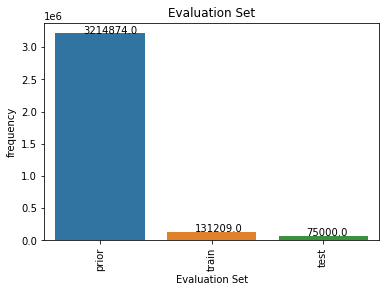

In [52]:
y = sns.countplot(x = orders["eval_set"], data = orders)
for p in y.patches:
    y.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
y.set_xticklabels(y.get_xticklabels(), rotation = 90)
y.set(title = "Evaluation Set", xlabel = "Evaluation Set", ylabel = "frequency")

###### Out of the 206209 users the last purchase of the 131209 users are given as the training set and the rest (75000) are given as
#### the test set for modeling

Text(0.5, 1.0, 'Reordered Products vs Not Reordered Products')

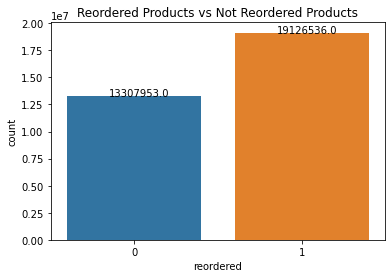

In [44]:

reordered = sns.countplot(x = instacart["reordered"], data = instacart)
for p in reordered.patches:
    reordered.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
reordered.set_title("Reordered Products vs Not Reordered Products")

In [24]:
# how many orders with no reordered products

order_count = instacart.groupby(["order_id"])["reordered"].sum().reset_index(name = "counts")
reordered, not_reordered = sum(order_count["counts"]!= 0), sum(order_count["counts"] == 0)
print("Orders with reordered items: ", reordered/instacart["order_id"].nunique())
print("Orders with no reordered items: ", not_reordered/instacart["order_id"].nunique())

Orders with reordered items:  0.8791514068669565
Orders with no reordered items:  0.12084859313304347


# User/Order Analysis

Text(0, 0.5, 'Number of Customers')

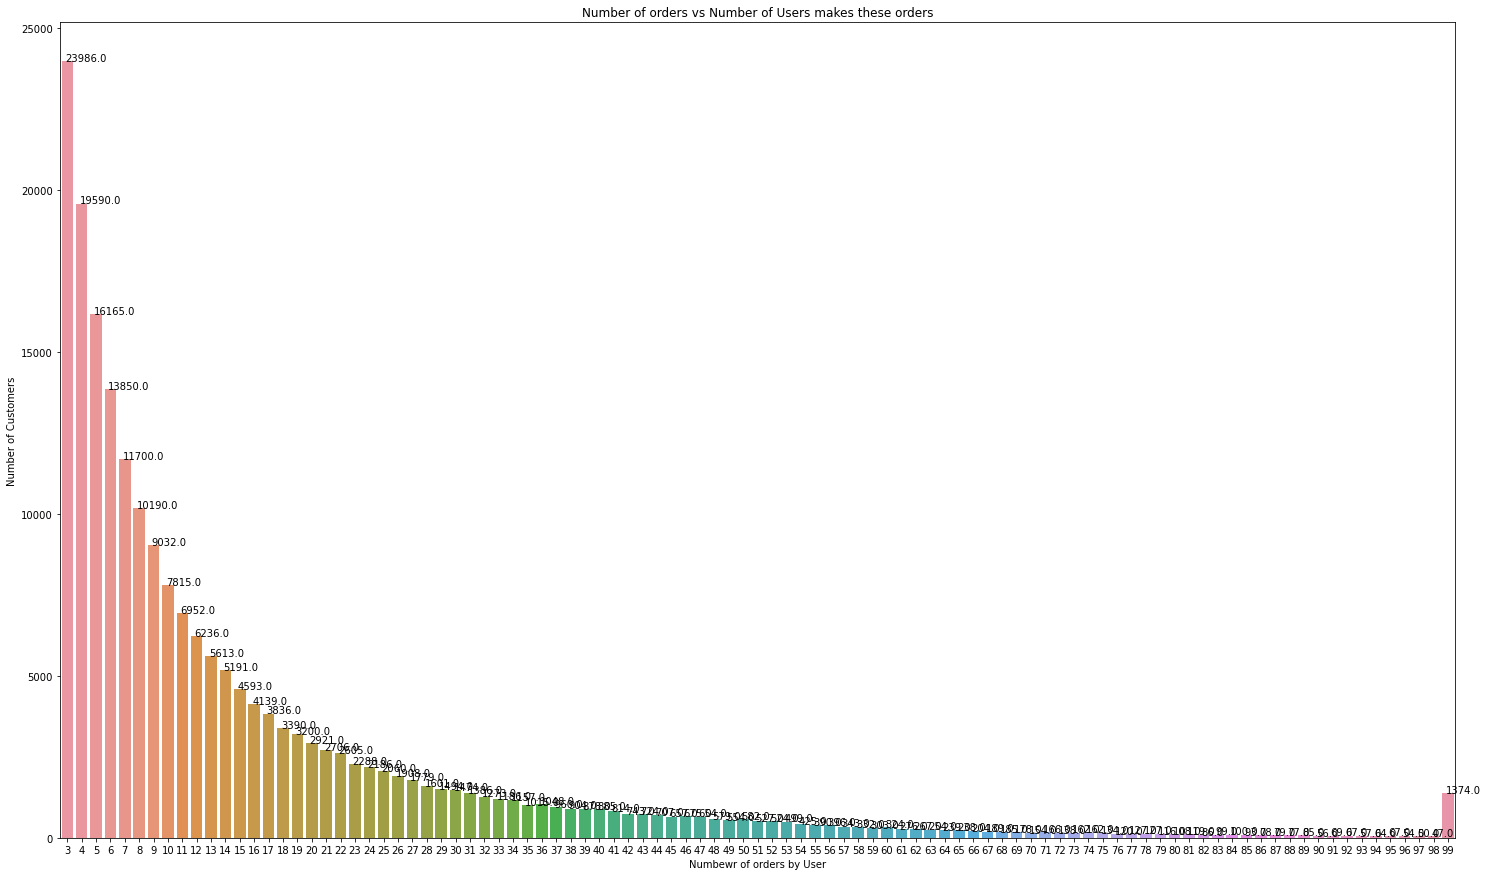

In [39]:
orders_per_customer = instacart.groupby("user_id")["order_number"].max().reset_index()
plt.figure(figsize=(25,15))
ax = sns.countplot(x = orders_per_customer["order_number"], data = instacart)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title("Number of orders vs Number of Users makes these orders")
ax.set_xlabel("Numbewr of orders by User")
ax.set_ylabel("Number of Customers")

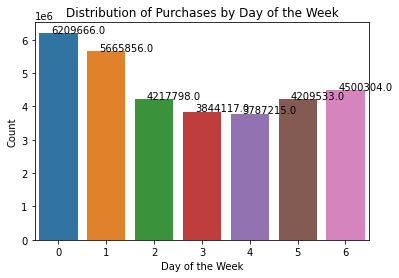

In [40]:
dow = sns.countplot(x = instacart["order_dow"], data = instacart)
for p in dow.patches:
    dow.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
dow.set_title("Distribution of Purchases by Day of the Week")
dow.set_xlabel("Day of the Week")
dow.set_ylabel("Count")
plt.savefig("Distribution of Purchases by Day of the Week")

[Text(0.5, 1.0, 'Distribution of User Orders by Days Since Last Order'),
 Text(0.5, 0, 'Days Since Last Ordered'),
 Text(0, 0.5, 'frequency')]

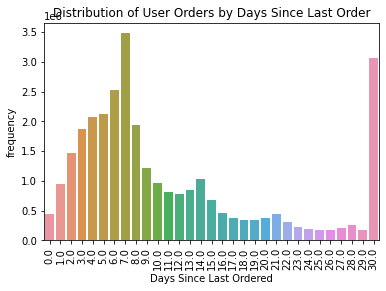

In [41]:
D_prior = sns.countplot(x = instacart["days_since_prior_order"], data = instacart)
D_prior.set_xticklabels(D_prior.get_xticklabels(), rotation = 90)
D_prior.set(title = "Distribution of User Orders by Days Since Last Order", xlabel = "Days Since Last Ordered", ylabel = "frequency")

[Text(0.5, 1.0, 'Hour of the Day Orders were Made'),
 Text(0.5, 0, 'Hours'),
 Text(0, 0.5, 'frequency')]

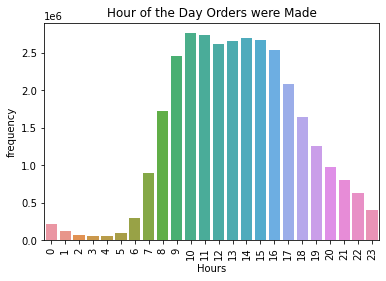

In [42]:
e_set = sns.countplot(x = instacart["order_hour_of_day"], data = instacart)
e_set.set_xticklabels(e_set.get_xticklabels(), rotation = 90)
e_set.set(title = "Hour of the Day Orders were Made", xlabel = "Hours", ylabel = "frequency")

[Text(0.5, 1.0, 'Top 10 Products Ordered'),
 Text(0.5, 0, 'Product Name'),
 Text(0, 0.5, 'Number Ordered')]

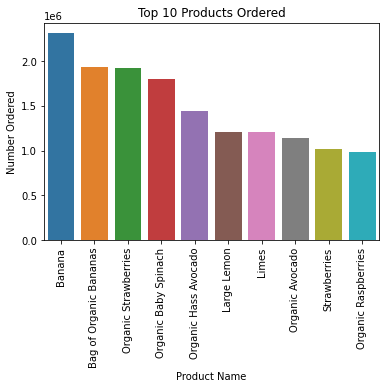

In [43]:
# most frequently purchased items

items = sns.barplot(data = instacart.groupby("product_name")["add_to_cart_order"].sum().sort_values(ascending = False).reset_index()[0:10], x = "product_name", y = "add_to_cart_order")
items.set_xticklabels(items.get_xticklabels(), rotation = 90)
items.set(title = "Top 10 Products Ordered", xlabel = "Product Name", ylabel = "Number Ordered")

[Text(0.5, 1.0, 'Top 10 Reordered Products'),
 Text(0.5, 0, 'Product Name'),
 Text(0, 0.5, 'Number Reordered')]

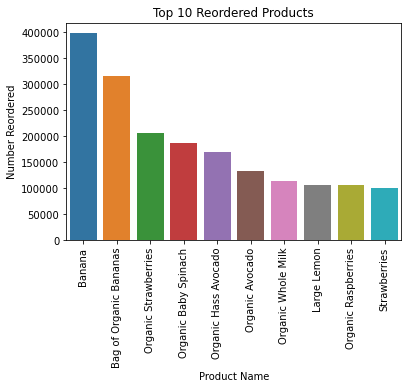

In [21]:
# Most frequently reordered items

items = sns.barplot(data = instacart.groupby('product_name')['reordered'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'product_name', y = 'reordered')
items.set_xticklabels(items.get_xticklabels(), rotation = 90)
items.set(title = "Top 10 Reordered Products", xlabel = 'Product Name', ylabel = 'Number Reordered')

[Text(0.5, 1.0, 'Top 10 Aisles Ordered From'),
 Text(0.5, 0, 'Aisle'),
 Text(0, 0.5, 'Units Ordered')]

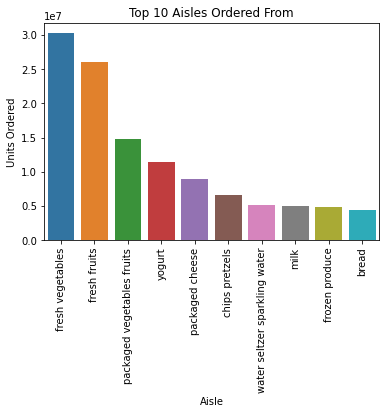

In [46]:
# most frequetly purchased items by department

a = sns.barplot(data = instacart.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'aisle', y = 'add_to_cart_order')
a.set_xticklabels(a.get_xticklabels(), rotation = 90)
a.set(title = "Top 10 Aisles Ordered From", xlabel = 'Aisle', ylabel = 'Units Ordered')

[Text(0.5, 1.0, 'Top 10 Aisles Reordered From'),
 Text(0.5, 0, 'Aisle'),
 Text(0, 0.5, 'Units Ordered')]

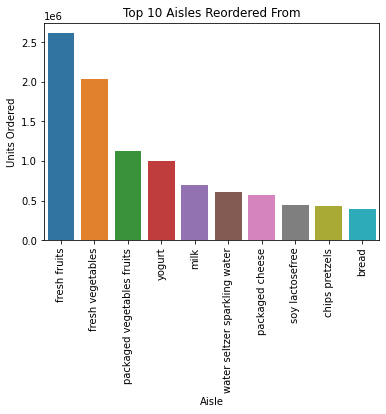

In [16]:
a = sns.barplot(data = instacart.groupby('aisle')['reordered'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'aisle', y = 'reordered')
a.set_xticklabels(a.get_xticklabels(), rotation = 90)
a.set(title = "Top 10 Aisles Reordered From", xlabel = 'Aisle', ylabel = 'Units Ordered')

[Text(0.5, 1.0, 'Top 10 Departments Ordered From'),
 Text(0.5, 0, 'Department'),
 Text(0, 0.5, 'Units Ordered')]

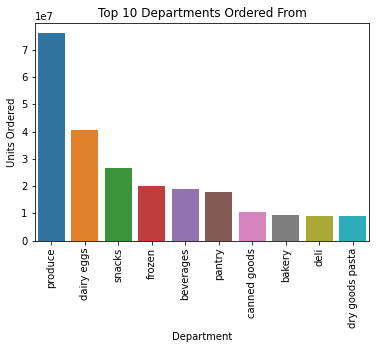

In [45]:
dept = sns.barplot(data = instacart.groupby('department')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'department', y = 'add_to_cart_order')
dept.set_xticklabels(dept.get_xticklabels(), rotation = 90)
dept.set(title = "Top 10 Departments Ordered From", xlabel = 'Department', ylabel = 'Units Ordered')

[Text(0.5, 1.0, 'Top 10 Departments Reordered From'),
 Text(0.5, 0, 'Department'),
 Text(0, 0.5, 'Units Ordered')]

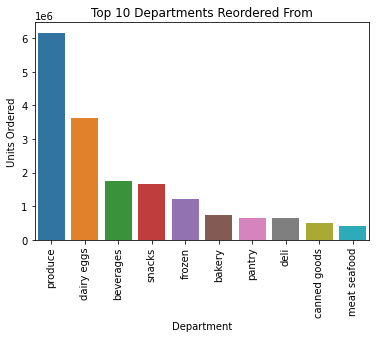

In [17]:
dept = sns.barplot(data = instacart.groupby('department')['reordered'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'department', y = 'reordered')
dept.set_xticklabels(dept.get_xticklabels(), rotation = 90)
dept.set(title = "Top 10 Departments Reordered From", xlabel = 'Department', ylabel = 'Units Ordered')

In [20]:
instacart.groupby("user_id")["days_since_prior_order"].mean().describe().round(3)

count    206209.000
mean         15.470
std           7.207
min           0.000
25%           9.554
50%          14.692
75%          20.724
max          30.000
Name: days_since_prior_order, dtype: float64

In [19]:
instacart.groupby("user_id")["add_to_cart_order"].mean().describe().round(3)

count    206209.000
mean          6.420
std           3.321
min           1.000
25%           4.036
50%           5.893
75%           8.217
max          39.776
Name: add_to_cart_order, dtype: float64

In [18]:
instacart.groupby("order_id")["add_to_cart_order"].mean().describe().round(3)

count    3214874.000
mean           5.544
std            3.763
min            1.000
25%            3.000
50%            4.500
75%            7.500
max           73.000
Name: add_to_cart_order, dtype: float64